In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
import keras
from keras import layers, losses
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import mean_squared_error as MSE
from keras.optimizers import SGD

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [58]:
df = pd.read_csv("D:\Documents\Codes\VisualStudioProjects\DATASETS\creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [59]:
df = df.drop(['Time', 'Amount'], axis=1)

In [60]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [61]:
normal = df[df.Class == 0]
abnormal = df[df.Class == 1]

In [62]:
normal = normal.drop(['Class'], axis=1)
abnormal = abnormal.drop(['Class'], axis=1)

In [63]:
scaler = MinMaxScaler()
scaler.fit(df.drop(['Class'], axis=1))
data = scaler.transform(normal)

In [64]:
train, test = train_test_split(data, test_size=0.2)

In [65]:
shape = data.shape[1]

In [66]:
encoder = Sequential([
    Dense(20, input_shape=(shape,), activation='relu'),
    Dropout(0.1),
    Dense(10, activation='relu'),
    Dense(5, activation='relu')
])

decoder = Sequential([
    Dense(10, input_shape=(5,), activation='relu'),
    Dropout(0.1),
    Dense(20, activation='relu'),
    Dense(shape, activation='sigmoid')
])

autoencoder = Sequential([encoder, decoder])

In [67]:
autoencoder.compile(loss=MSE, optimizer=SGD(), metrics=[MSE])

In [68]:
H = autoencoder.fit(train,train, validation_data=[test,test], epochs=10)

Epoch 1/10
7108/7108 [==============================] - 11s 1ms/step - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 2/10
7108/7108 [==============================] - 11s 1ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 3/10
7108/7108 [==============================] - 10s 1ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 4/10
7108/7108 [==============================] - 10s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 5/10
7108/7108 [==============================] - 11s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 6/10
7108/7108 [==============================] - 10s 1ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 7/10

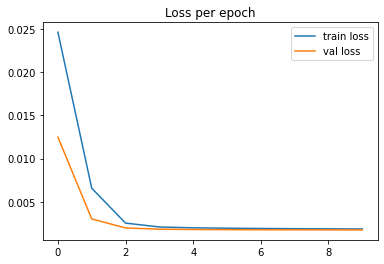

In [69]:
plt.figure()
plt.plot(np.arange(0, 10), H.history['loss'], label='train loss')
plt.plot(np.arange(0, 10), H.history['val_loss'], label='val loss')
plt.title("Loss per epoch")
plt.legend()

In [70]:
encoding = encoder.predict(test)

1777/1777 [==============================] - 2s 854us/step


In [71]:
test[0]

array([0.9905354 , 0.76252467, 0.83257279, 0.26362738, 0.76083595,
       0.25766624, 0.26241675, 0.78543437, 0.48757892, 0.51180005,
       0.34809021, 0.7515643 , 0.46857617, 0.64959783, 0.32010934,
       0.46751538, 0.71003727, 0.64875581, 0.57948205, 0.57911685,
       0.55851158, 0.48586836, 0.67156064, 0.39217475, 0.53900836,
       0.45865144, 0.41564258, 0.31216962])

In [72]:
encoding[0]

array([0.1422405 , 0.        , 0.57267773, 0.        , 0.        ],
      dtype=float32)

In [73]:
decoding = decoder.predict(encoding)

1777/1777 [==============================] - 2s 814us/step


In [74]:
decoding[0]

array([0.93511426, 0.76655334, 0.83585286, 0.2524316 , 0.76432   ,
       0.260916  , 0.2636914 , 0.78473115, 0.461568  , 0.5087195 ,
       0.28412405, 0.70579517, 0.44953176, 0.64791524, 0.33897495,
       0.4520915 , 0.72937644, 0.6530137 , 0.5635625 , 0.583289  ,
       0.5619003 , 0.5117941 , 0.6632979 , 0.38189384, 0.58018416,
       0.42615837, 0.4152297 , 0.3131602 ], dtype=float32)

In [76]:
pred = autoencoder.predict(test)

1777/1777 [==============================] - 2s 1ms/step
